# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Import Datasets

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data =pd.DataFrame(boston['data'], columns=boston['feature_names'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
target = pd.Series(boston['target'])
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [6]:
target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

# EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
listItem = []
for col in data.columns:
    listItem.append([col, data[col].dtype, data[col].isna().sum(),
                    round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].unique()[:2])]);
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null',
                              'nullPct', 'unique', 'uniqueSample'],
                     data = listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,CRIM,float64,0,0.0,504,"[0.00632, 0.02731]"
1,ZN,float64,0,0.0,26,"[18.0, 0.0]"
2,INDUS,float64,0,0.0,76,"[2.31, 7.07]"
3,CHAS,float64,0,0.0,2,"[0.0, 1.0]"
4,NOX,float64,0,0.0,81,"[0.538, 0.469]"
5,RM,float64,0,0.0,446,"[6.575, 6.421]"
6,AGE,float64,0,0.0,356,"[65.2, 78.9]"
7,DIS,float64,0,0.0,412,"[4.09, 4.9671]"
8,RAD,float64,0,0.0,9,"[1.0, 2.0]"
9,TAX,float64,0,0.0,66,"[296.0, 242.0]"


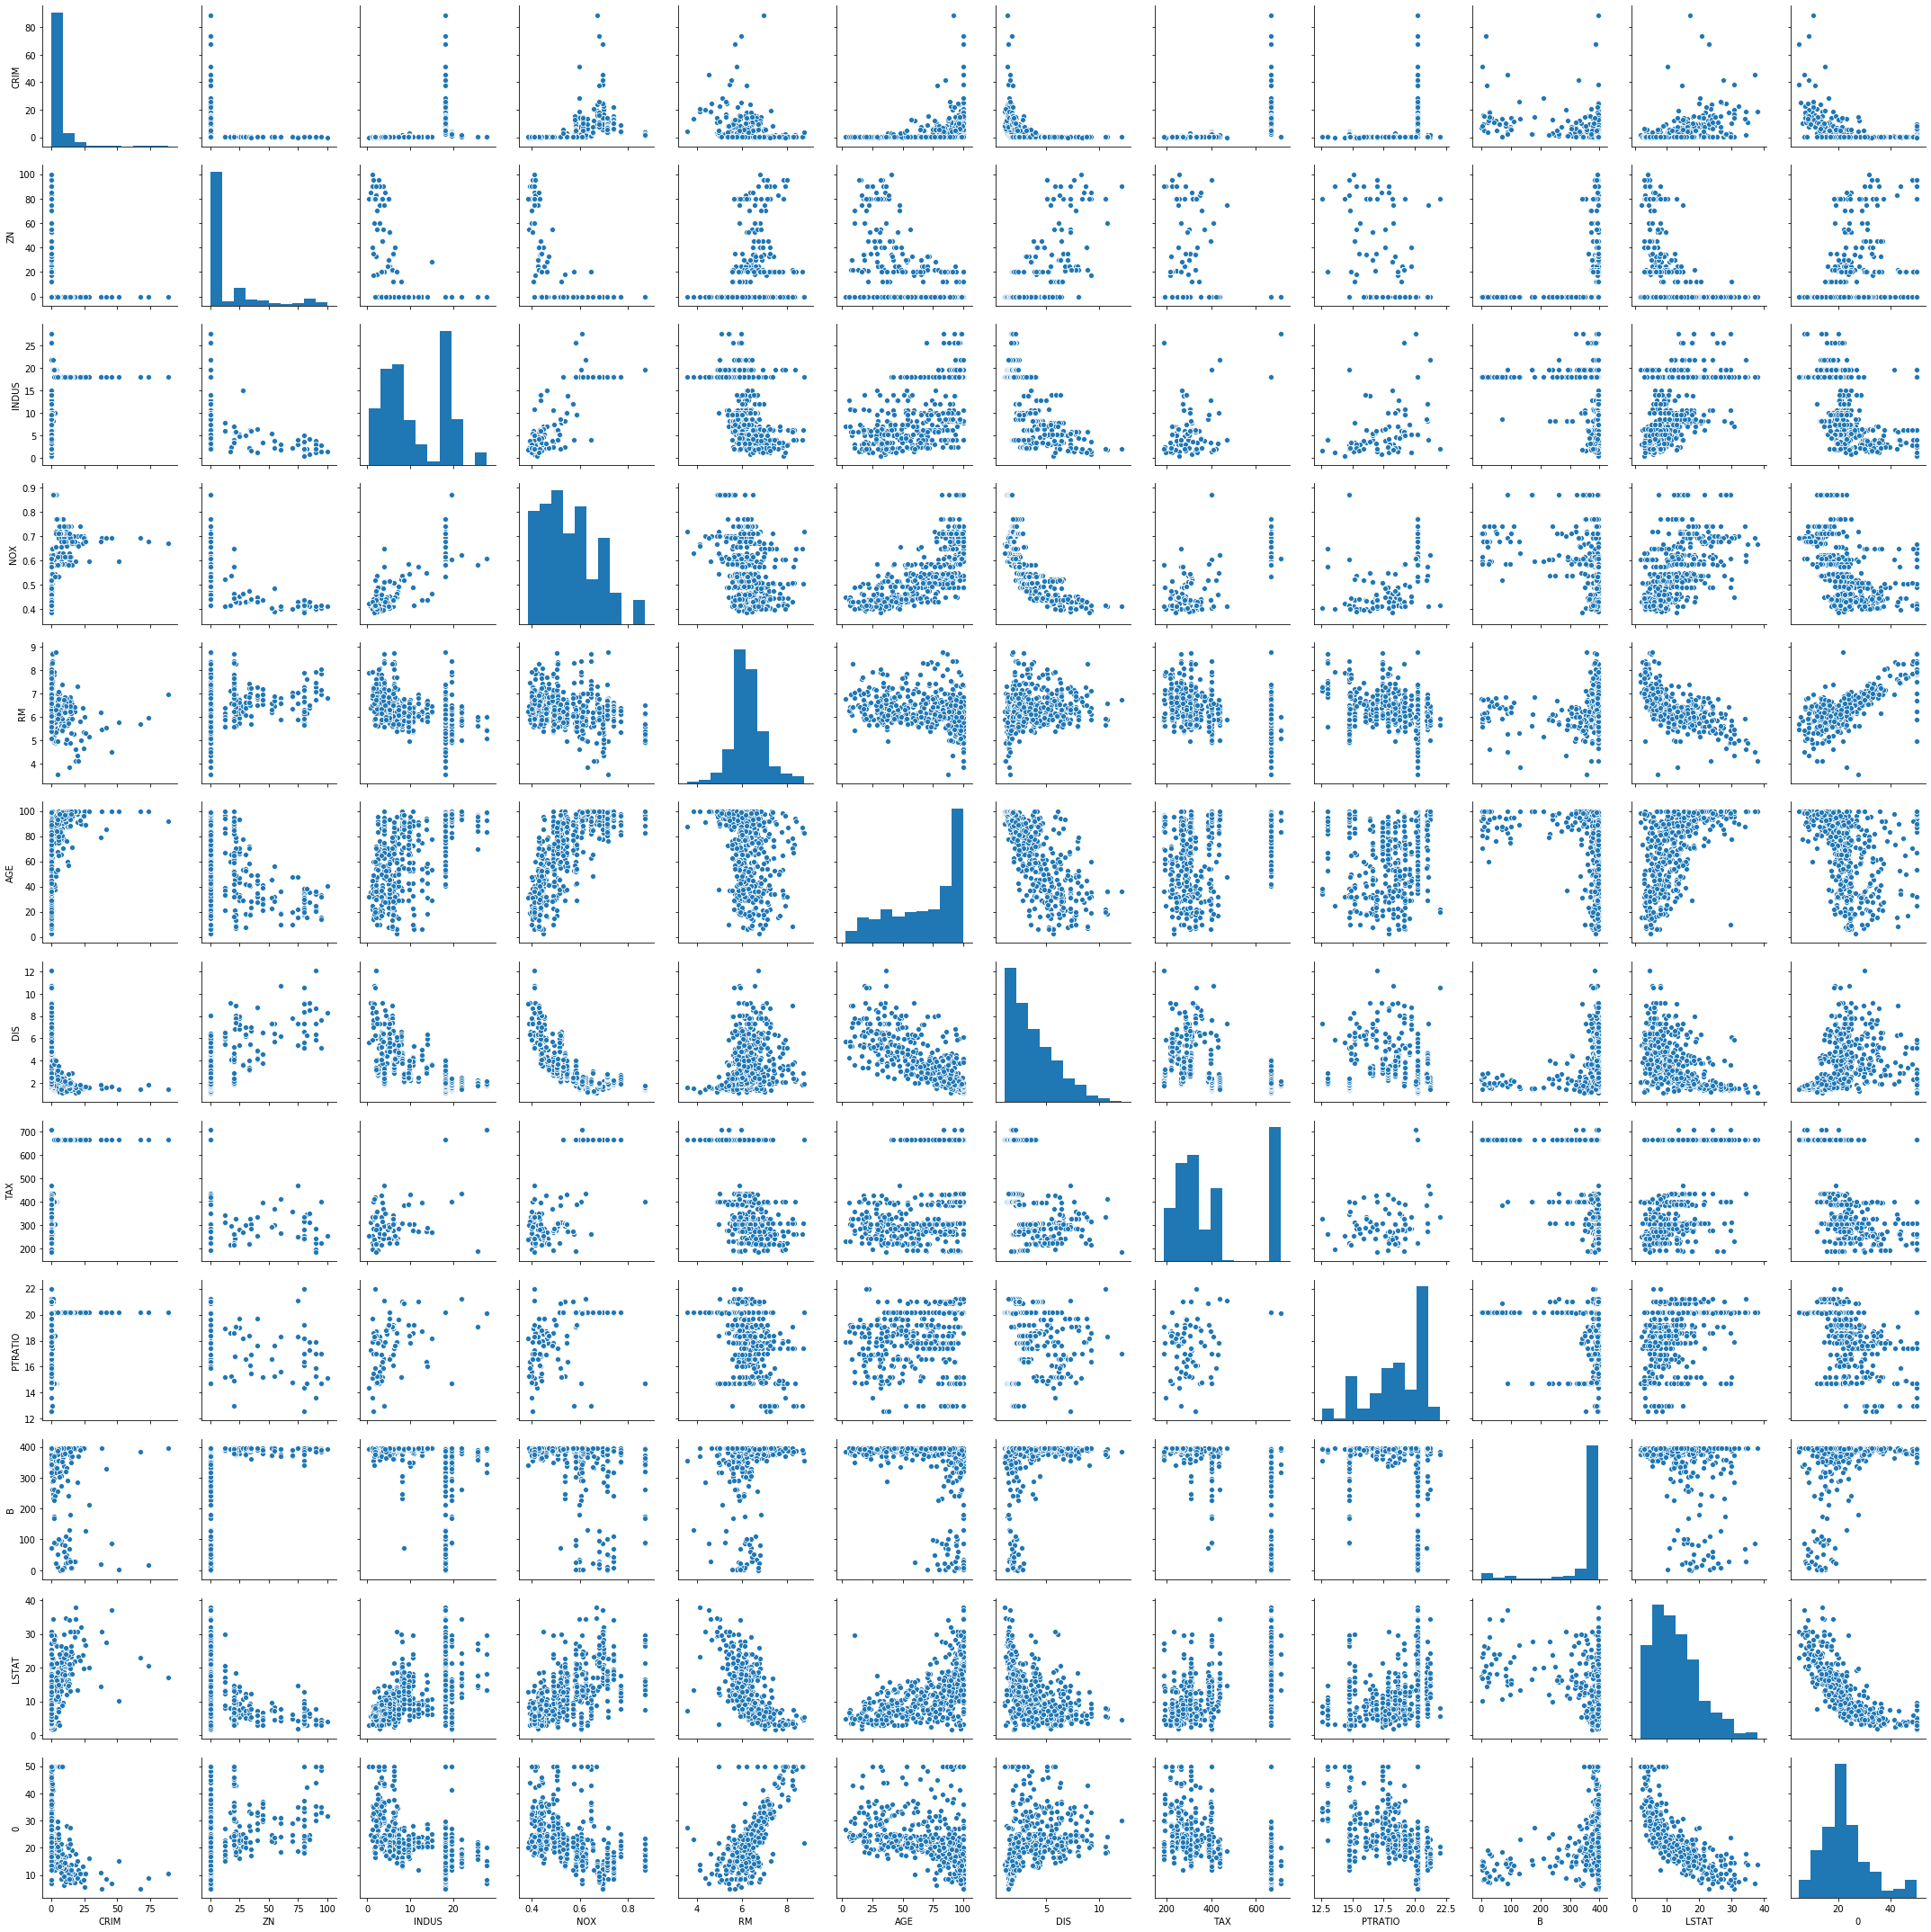

In [10]:
sns.pairplot(pd.concat([data.drop(['CHAS','RAD'], axis=1), target], axis=1))

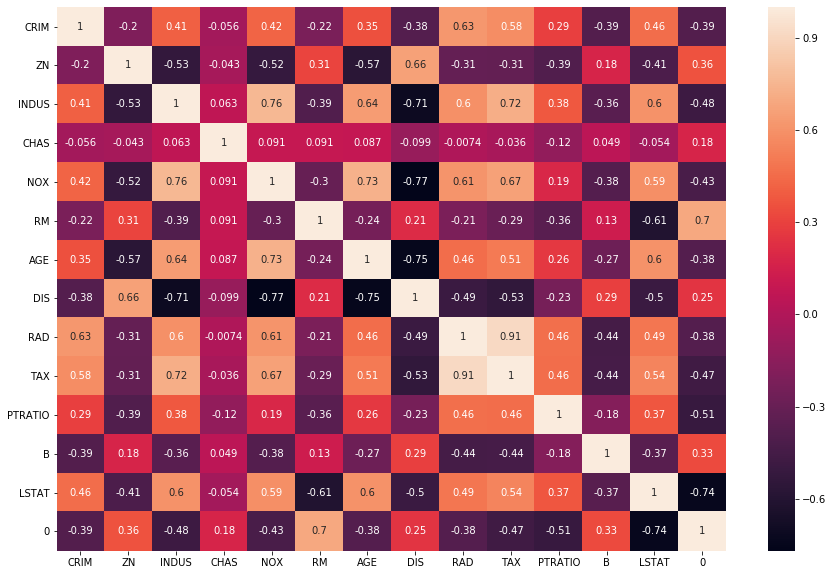

In [11]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(pd.concat([data,target], axis=1).corr(), annot=True)

# Feature Engineering

In [12]:
#data = data.drop(['RAD','CHAS', 'ZN'], axis=1)

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.30, random_state=101)

In [14]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
370,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
86,0.05188,0.0,4.49,0.0,0.4490,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86
241,0.10612,30.0,4.93,0.0,0.4280,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40


In [15]:
X_train.shape

(354, 13)

# Linear Regression Testing

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print(lm.intercept_)

40.2189290125508


In [35]:
coeff_df = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.088505
ZN,0.050293
INDUS,0.020348
CHAS,3.754271
NOX,-17.748371
RM,3.247765
AGE,0.012001
DIS,-1.409161
RAD,0.263881
TAX,-0.010344


## Training Error

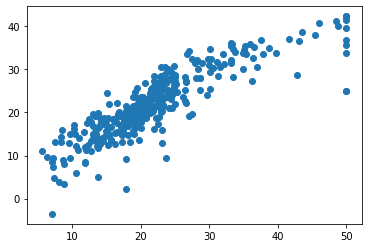

In [22]:
predictions = lm.predict(X_train)
plt.scatter(y_train, predictions)

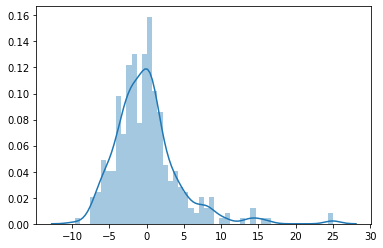

In [23]:
sns.distplot((y_train-predictions), bins=50)

In [25]:
print('MAE: ', mean_absolute_error(y_train, predictions))
print('MSE: ', mean_squared_error(y_train, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score: ', r2_score(y_train, predictions))

MAE:  3.073138872504538
MSE:  19.475903780713956
RMSE:  4.413151230211124
R2 Score:  0.7471263931918002


In [26]:
sum(abs((predictions-y_train)))/len(y_train)

3.0731388725045368

In [28]:
sum(((predictions-y_train)**2))/len(y_train)

19.475903780713953

In [29]:
np.sqrt(sum(((predictions-y_train)**2))/len(y_train))

4.413151230211123

## Testing Error

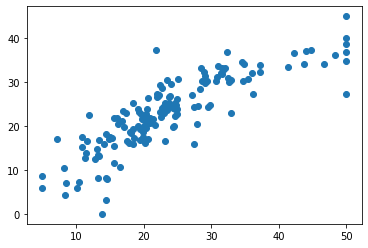

In [31]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

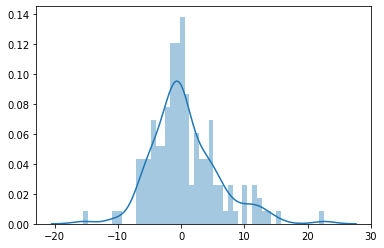

In [32]:
sns.distplot((y_test-predictions), bins=50)

In [33]:
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score: ', r2_score(y_test, predictions))

MAE:  3.835696361418929
MSE:  28.547585271468172
RMSE:  5.342994036256092
R2 Score:  0.7123963332666869


### syarat Linear Regression:
    residual error normal dist
    hubungan ytr dan pred linear reg
    variance stabil
    tidak ada multikol

# Ridge Regression

In [36]:
from sklearn.linear_model import Ridge

In [54]:
rlm = Ridge(alpha=0.1, normalize=True)

In [55]:
rlm.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [56]:
print(rlm.intercept_)

29.558711576188905


In [57]:
coeff_df = pd.DataFrame(rlm.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.071598
ZN,0.034563
INDUS,-0.035249
CHAS,3.874812
NOX,-10.650977
RM,3.595262
AGE,0.002779
DIS,-0.993153
RAD,0.117426
TAX,-0.004648


### Training Error

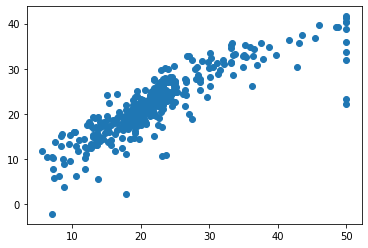

In [58]:
predictions = rlm.predict(X_train)
plt.scatter(y_train, predictions)

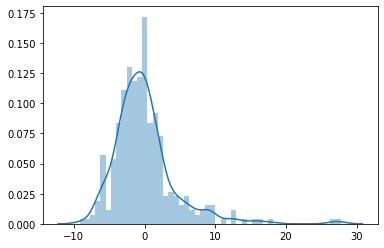

In [59]:
sns.distplot((y_train-predictions), bins=50)

In [60]:
print('MAE: ', mean_absolute_error(y_train, predictions))
print('MSE: ', mean_squared_error(y_train, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score: ', r2_score(y_train, predictions))

MAE:  3.023674737048844
MSE:  20.196515495678977
RMSE:  4.4940533481122555
R2 Score:  0.7377700272165331


### Testing Error


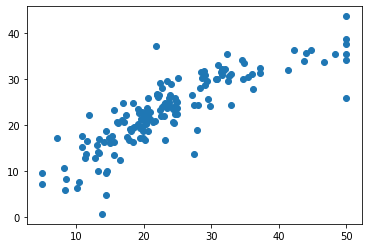

In [61]:
predictions = rlm.predict(X_test)
plt.scatter(y_test, predictions)

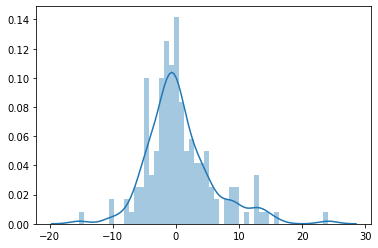

In [62]:
sns.distplot((y_test-predictions), bins=50)

In [63]:
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score: ', r2_score(y_test, predictions))

MAE:  3.782193848794667
MSE:  29.23001076732703
RMSE:  5.406478592145448
R2 Score:  0.7055212132516337


# Lasso Regression

In [65]:
from sklearn.linear_model import Lasso

In [75]:
llm = Lasso(alpha=0.1)

In [76]:
llm.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
print(llm.intercept_)

29.4062085654174


In [78]:
coeff_df = pd.DataFrame(llm.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.080633
ZN,0.051846
INDUS,-0.028935
CHAS,2.215957
NOX,-0.000000
RM,3.112495
AGE,0.000000
DIS,-1.072913
RAD,0.229585
TAX,-0.012452


### Training Error

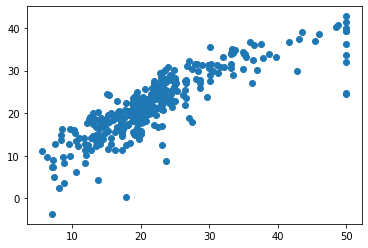

In [79]:
predictions = llm.predict(X_train)
plt.scatter(y_train, predictions)

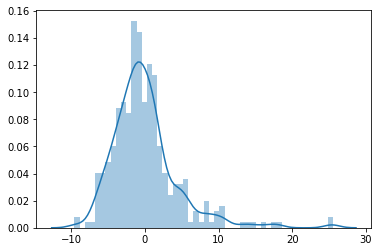

In [80]:
sns.distplot((y_train-predictions), bins=50)

In [81]:
print('MAE: ', mean_absolute_error(y_train, predictions))
print('MSE: ', mean_squared_error(y_train, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score: ', r2_score(y_train, predictions))

MAE:  3.137706701036733
MSE:  20.668085360305607
RMSE:  4.54621659848116
R2 Score:  0.7316472010887785


### Testing Error

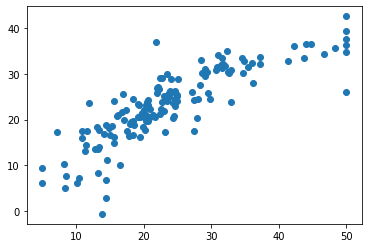

In [82]:
predictions = llm.predict(X_test)
plt.scatter(y_test, predictions)

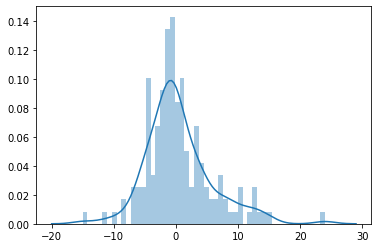

In [83]:
sns.distplot((y_test-predictions), bins=50)

In [84]:
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score: ', r2_score(y_test, predictions))

MAE:  3.8504570356583305
MSE:  29.385746685065634
RMSE:  5.420862171745896
R2 Score:  0.7039522461898744


### Feature Importance

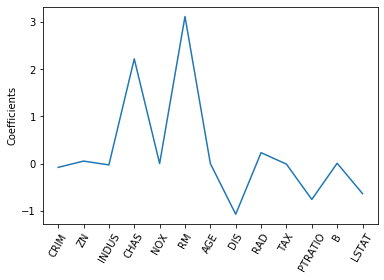

In [86]:
plt.plot(range(len(X_train.columns)), llm.coef_)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.ylabel('Coefficients')
plt.show()

# Gradient Boosting Testing

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

In [88]:
gbr = GradientBoostingRegressor(learning_rate=0.1, random_state=101)

In [89]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=101, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Training Error

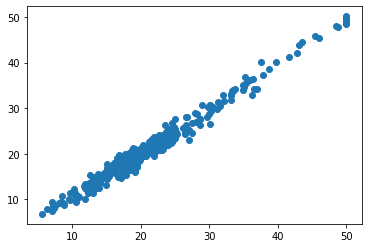

In [90]:
predictions = gbr.predict(X_train)
plt.scatter(y_train, predictions)

In [91]:
print('MAE: ', mean_absolute_error(y_train, predictions))
print('MSE: ', mean_squared_error(y_train, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score: ', r2_score(y_train, predictions))

MAE:  0.9778945955502316
MSE:  1.4701514806795035
RMSE:  1.2124980332683033
R2 Score:  0.9809116685079344


## Testing Error

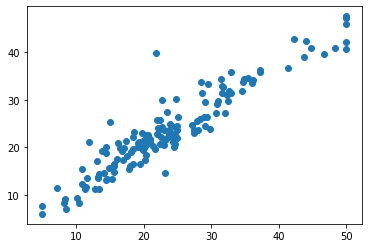

In [93]:
predictions = gbr.predict(X_test)
plt.scatter(y_test, predictions)

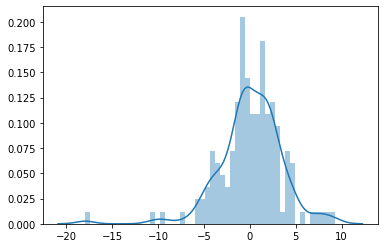

In [94]:
sns.distplot((y_test-predictions), bins=50)

In [95]:
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score: ', r2_score(y_test, predictions))

MAE:  2.4842757917364775
MSE:  11.818736900357871
RMSE:  3.4378389869739205
R2 Score:  0.8809317132648529


## Feature Importance

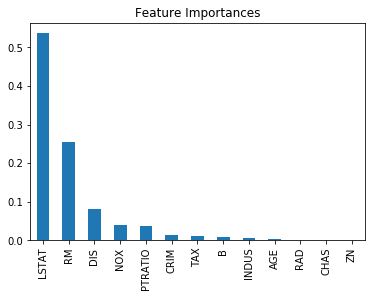

In [96]:
coef1 = pd.Series(gbr.feature_importances_, data.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

In [97]:
# gradient boosting cenderung overfit tapi di atas tidak

# XGBoost Testing

In [104]:
from xgboost import XGBRegressor

In [105]:
xgb = XGBRegressor(random_state=101)
xgb.fit(X_train, y_train)

[16:10:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

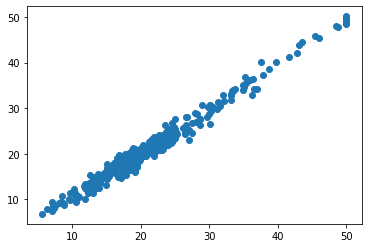

In [106]:
predictions = gbr.predict(X_train)
plt.scatter(y_train, predictions)

In [107]:
print('MAE: ', mean_absolute_error(y_train, predictions))
print('MSE: ', mean_squared_error(y_train, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score: ', r2_score(y_train, predictions))

MAE:  0.9778945955502316
MSE:  1.4701514806795035
RMSE:  1.2124980332683033
R2 Score:  0.9809116685079344


In [124]:
dict = {'Prediction': predictions, 'Actual': y_train, 'Selisih': abs(predictions-y_train), 
        'Selisih %': ((abs(predictions-y_train)/y_train))*100}
df = pd.DataFrame(dict)
df.head()

,Prediction,Actual,Selisih,Selisih %
204,48.669724,50.0,1.330276,2.660551
370,48.838549,50.0,1.161451,2.322903
485,21.065107,21.2,0.134893,0.636285
86,21.121485,22.5,1.378515,6.126735
241,20.944001,20.1,0.844001,4.199010


In [130]:
y_train

204    50.0
370    50.0
485    21.2
86     22.5
241    20.1
408    17.2
453    17.8
324    25.0
109    19.4
93     25.0
257    50.0
349    26.6
289    24.8
121    20.3
9      18.9
178    29.9
447    12.6
445    11.8
359    22.6
281    35.4
261    43.1
16     23.1
412    17.9
430    14.5
41     26.6
431    14.1
295    28.6
325    24.6
216    23.3
335    21.1
       ... 
478    14.6
413    16.3
371    50.0
136    17.4
111    22.8
339    19.0
49     19.4
498    21.2
477    12.0
396    12.5
5      28.7
110    21.7
192    36.4
220    26.7
316    17.8
245    18.5
424    11.7
501    22.4
132    23.0
40     34.9
461    17.7
393    13.8
495    23.1
75     21.4
87     22.2
63     25.0
326    23.0
337    18.5
11     18.9
351    24.1
Length: 354, dtype: float64